# Visualizing statistical relationships

RELATING VARIABLES WITH SCATTER PLOT 
- Using relplot(), a figure level function for visualizing statistical relationships using scatterplots and lineplots
- The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"):

In [1]:
#STEP 1 --- Importing the neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.__version__

'0.10.0'

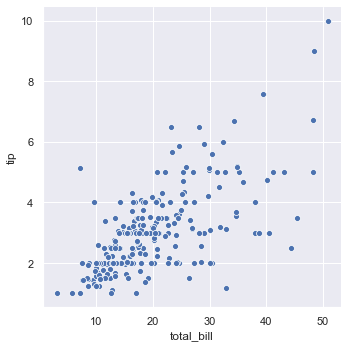

In [2]:
sns.set(style="darkgrid") #style = dict, None, or one of {darkgrid, whitegrid, dark, white, ticks} --- style of axes

tips = sns.load_dataset("tips") #Load an example dataset from the online repository (requires internet)
sns.relplot(x="total_bill", y="tip", data=tips); # semicolon(;) at the end stops the graph text to be printed

 - Another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning
 - The dimension and height of the figure is specified
 - To change the size of circles, parameter "s" is used

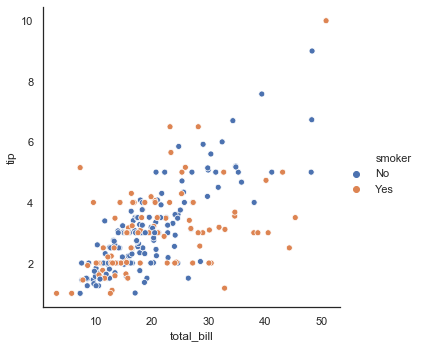

In [3]:
sns.set(style="white")
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

- To emphasize the difference between the classes, and to improve accessibility, a different marker style can be used for each class
- Another way to specify the dimension of chart is by using matplotlib

<Figure size 576x720 with 0 Axes>

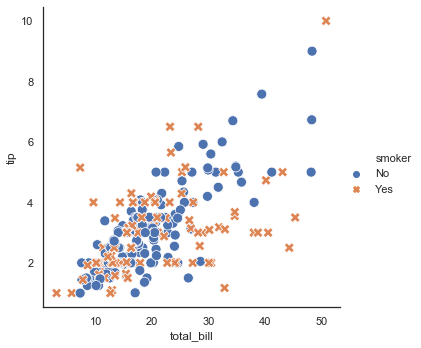

In [4]:
from matplotlib import pyplot as plt  

plt.figure(figsize=(8,10))
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips, s=100);

 - It is also possible to represent four variables by changing the hue and style of each point independently. 
 - This should be done carefully, because the eye is much less sensitive to shape than to color:

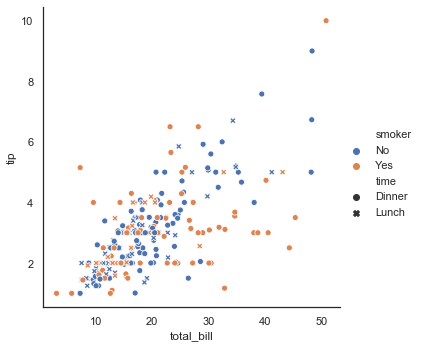

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

In the examples above, the hue semantic was categorical, so the default qualitative palette was applied. If the hue semantic is numeric (specifically, if it can be cast to float), 
the default coloring switches to a sequential palette:

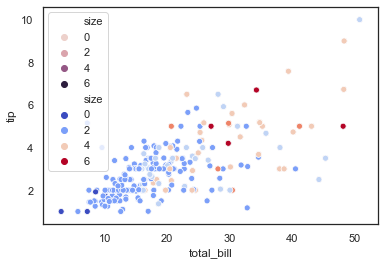

In [6]:
sns.scatterplot(x="total_bill", y="tip", hue="size", data=tips);

#changing the color palette
sns.scatterplot(x="total_bill", y="tip", hue="size", palette="coolwarm", data=tips);

The third kind of semantic variable changes the size of each point:

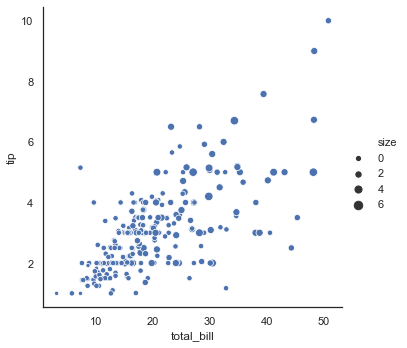

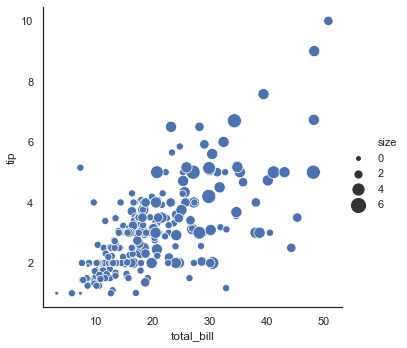

In [7]:
# plot based on the size of each point
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

#the literal value of the variable is not used to pick the area of the point. Instead, the range of values in data units is 
#normalized into a range in area units. This range can be customized:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);


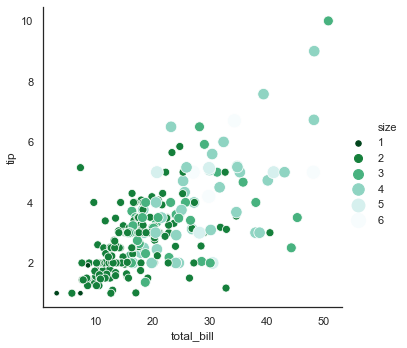

In [9]:
# 
sns.relplot(x="total_bill", y="tip", hue="size", size="size", palette = ("BuGn_r"),
                     sizes=(30, 200), legend="full" ,data=tips);

# Pairwise plots

FACETGRID
- Useful when we want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of the dataset. 
- A FacetGrid can be drawn with up to three dimensions: row, col, and hue
- These variables should be categorical or discrete
- Data at each level of the variable will be used for a facet along that axis

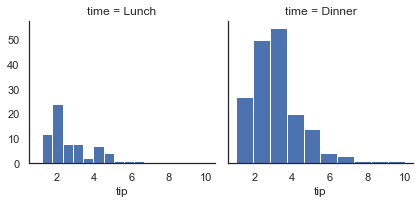

In [10]:
#sns.set(style="white")
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");


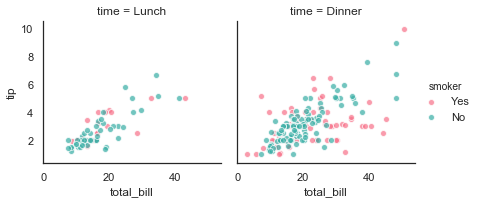

In [11]:

g = sns.FacetGrid(tips, col="time", hue="smoker", palette="husl")
g.map(plt.scatter, "total_bill", "tip", alpha=.7, edgecolor ="w")
g.add_legend();

In [12]:
iris= pd.read_csv("iris.csv")

In [13]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

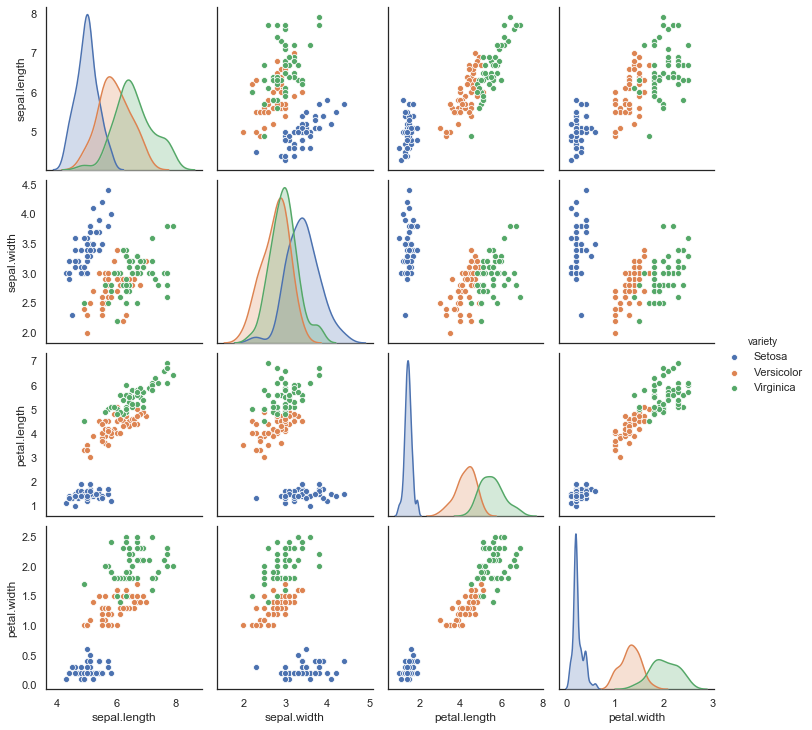

In [15]:
sns.pairplot(iris, hue="variety", height=2.5);

PAIRGRID - Subplot grid for plotting pairwise relationships in a dataset.

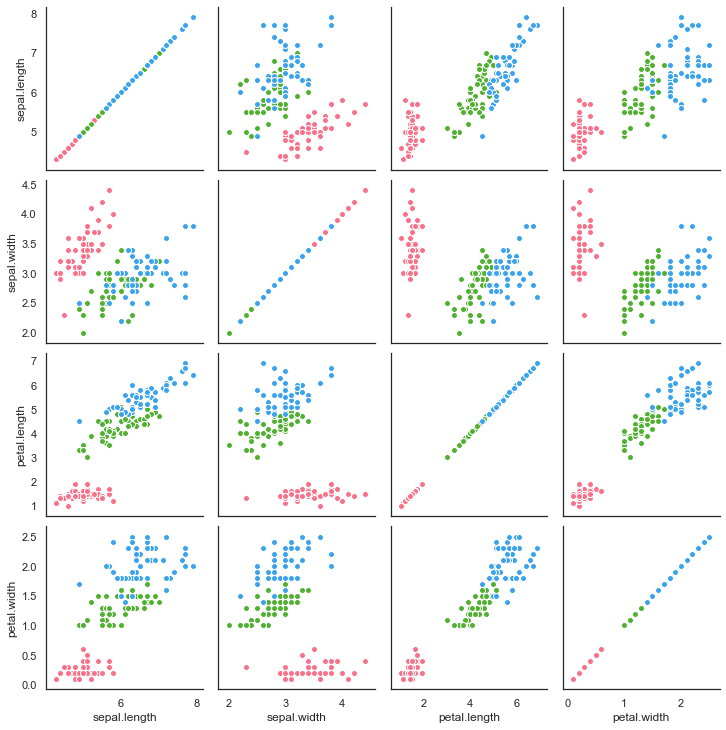

In [16]:
g = sns.PairGrid(iris, hue="variety", palette = ("husl"));
g.map(plt.scatter, edgecolor="w");

In [ ]:
%whos

In [ ]:
%%time
print("hi")

# Heatmaps

- A heatmap is a two-dimensional graphical representation of data where the individual values that are 
contained in a matrix are represented as colors.
- The variation in color may be by hue or intensity, giving visual cues to the reader about how the phenomenon is clustered or varies

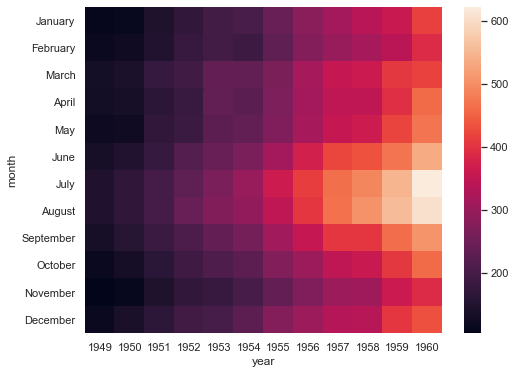

In [17]:
 # Heatmap with default seaborn settings
plt.figure(figsize=(8,6))
#cmap = sns.cm.rocket_r  #Reverses the color palette

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights) # Returns ax, a matplotlib axes

#ax.tick_params(axis = 'x', labelrotation=90)

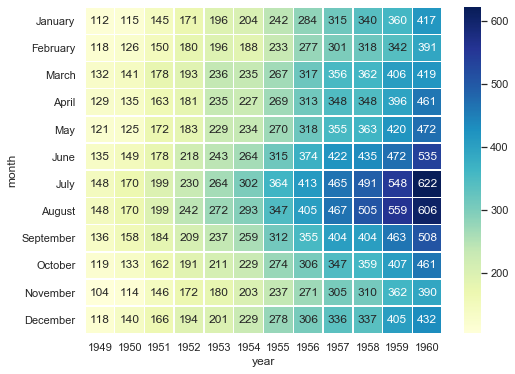

In [18]:
# Changing color palette, adding space between each square, adding values etc
plt.figure(figsize=(8,6))
sns.heatmap(flights, cmap="YlGnBu", linewidths=.5, annot=True, fmt="d");

# Boxplots


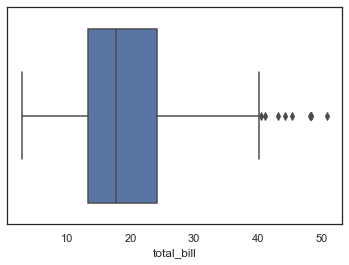

In [19]:
tips = pd.read_csv("tips.csv")    # load data using pandas dataframes
#tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

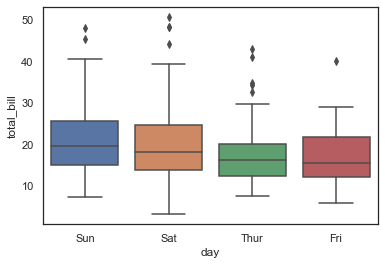

In [20]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

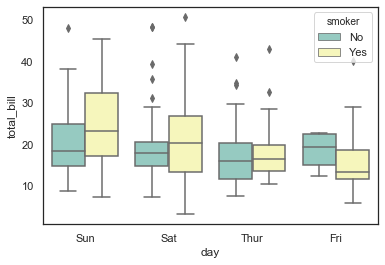

In [21]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")